In [50]:
import talos as ta
import wrangle as wr
from talos.metrics.keras_metrics import fmeasure_acc
from talos import live

import pandas as pd

from keras.models import Sequential
from keras.layers import Dropout, Dense

# Keras items
from keras.optimizers import Adam, Nadam
from keras.activations import relu, elu
from keras.losses import binary_crossentropy,categorical_crossentropy

%matplotlib inline

In [51]:
# then we load the dataset
x, y = ta.datasets.breast_cancer()

# and normalize every feature to mean 0, std 1
x = wr.mean_zero(pd.DataFrame(x)).values

In [52]:
# first we have to make sure to input data and params into the function
def breast_cancer_model(x_train, y_train, x_val, y_val, params):

    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],
                    activation=params['activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.add(Dropout(params['dropout']))

    model.add(Dense(1, activation=params['last_activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.compile(loss=params['losses'],
                  optimizer=params['optimizer'](),
                  metrics=['acc', fmeasure_acc])
    
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        callbacks=[live()],
                        epochs=params['epochs'],
                        verbose=0)

    return history, model

In [56]:
# then we can go ahead and set the parameter space
p = {'first_neuron':[5,10,20,30],
     'hidden_layers':[1,2,3],
     'batch_size': [30,100],
     'epochs': [40],
     'dropout': [0],
     'kernel_initializer': ['normal'],
     'optimizer': [Nadam, Adam],
     'losses': [binary_crossentropy],
     'activation':[relu],
     'last_activation': ['sigmoid']}

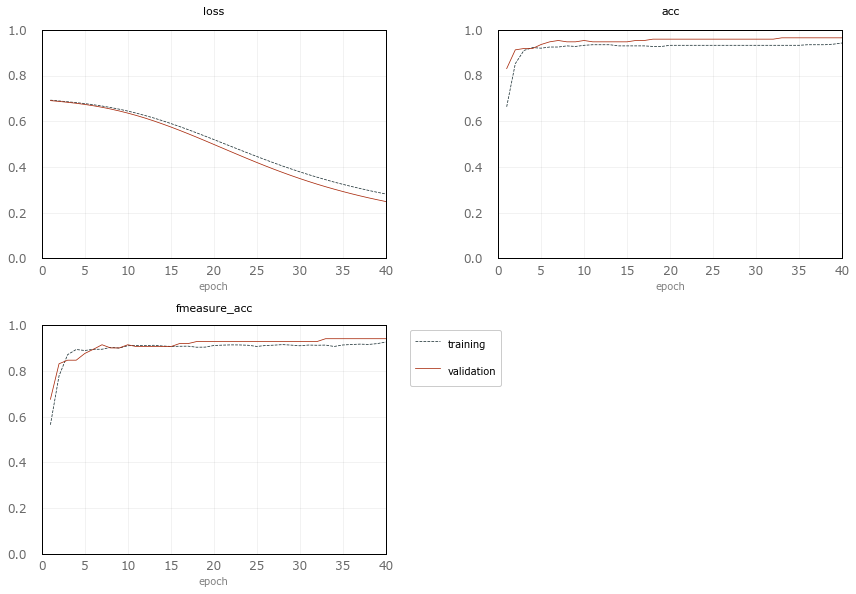












100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [19:14<00:00, 24.44s/it]












Scan Finished!


In [57]:
# and run the experiment
t = ta.Scan(x=x,
            y=y,
            model=breast_cancer_model,
            params=p,
            dataset_name='breast_cancer',
            experiment_no='1')

In [59]:
r = ta.Reporting("C:/Projects/Prectice/breast_cancer_1.csv")

In [31]:
r.best_params()

array([["<class 'keras.optimizers.Adam'>", 'normal', 30,
        '<function relu at 0x00000299E4C0A2F0>', 100, 'sigmoid', 10,
        '<function binary_crossentropy at 0x00000299E4BD3488>', 1, 0, 0],
       ["<class 'keras.optimizers.Adam'>", 'normal', 30,
        '<function relu at 0x00000299E4C0A2F0>', 100, 'sigmoid', 9,
        '<function binary_crossentropy at 0x00000299E4BD3488>', 1, 0, 1],
       ["<class 'keras.optimizers.Nadam'>", 'normal', 30,
        '<function relu at 0x00000299E4C0A2F0>', 100, 'sigmoid', 10,
        '<function binary_crossentropy at 0x00000299E4BD3488>', 1, 0, 2],
       ["<class 'keras.optimizers.Nadam'>", 'normal', 30,
        '<function relu at 0x00000299E4C0A2F0>', 100, 'sigmoid', 9,
        '<function binary_crossentropy at 0x00000299E4BD3488>', 1, 0, 3],
       ["<class 'keras.optimizers.Adam'>", 'normal', 30,
        '<function relu at 0x00000299E4C0A2F0>', 100, 'sigmoid', 9,
        '<function binary_crossentropy at 0x00000299E4BD3488>', 2, 0, 4],
 

In [47]:
# accessing the results data frame
r.data.head()

# accessing epoch entropy values for each round
# r.peak_epochs_df

# access the summary details
# r.details

,round_epochs,val_loss,val_acc,val_fmeasure_acc,loss,acc,fmeasure_acc,first_neuron,hidden_layers,batch_size,epochs,dropout,kernel_initializer,optimizer,losses,activation,last_activation,nan
0,100,0.047173,0.988304,0.984018,0.054912,0.984925,0.984622,9,2,30,100,0,normal,<class 'keras.optimizers.Adam'>,<function binary_crossentropy at 0x00000299E4B...,<function relu at 0x00000299E4C0A2F0>,sigmoid,0
1,100,0.053863,0.994152,0.991646,0.052018,0.984925,0.985111,10,1,30,100,0,normal,<class 'keras.optimizers.Adam'>,<function binary_crossentropy at 0x00000299E4B...,<function relu at 0x00000299E4C0A2F0>,sigmoid,1
2,100,0.046383,0.988304,0.984018,0.032603,0.989950,0.989545,10,2,30,100,0,normal,<class 'keras.optimizers.Nadam'>,<function binary_crossentropy at 0x00000299E4B...,<function relu at 0x00000299E4C0A2F0>,sigmoid,2
3,100,0.046709,0.994152,0.991646,0.052736,0.984925,0.982812,9,1,30,100,0,normal,<class 'keras.optimizers.Adam'>,<function binary_crossentropy at 0x00000299E4B...,<function relu at 0x00000299E4C0A2F0>,sigmoid,3
4,100,0.054119,0.988304,0.984018,0.052108,0.984925,0.983612,10,2,30,100,0,normal,<class 'keras.optimizers.Adam'>,<function binary_crossentropy at 0x00000299E4B...,<function relu at 0x00000299E4C0A2F0>,sigmoid,4


In [32]:
r.rounds2high()

1

In [33]:
r.high('acc')

0.9899497493427604

In [35]:
r.rounds()

8

In [34]:
r.correlate('val_loss')

first_neuron     0.010029
hidden_layers    0.070009
batch_size            NaN
epochs                NaN
dropout               NaN
Name: val_loss, dtype: float64

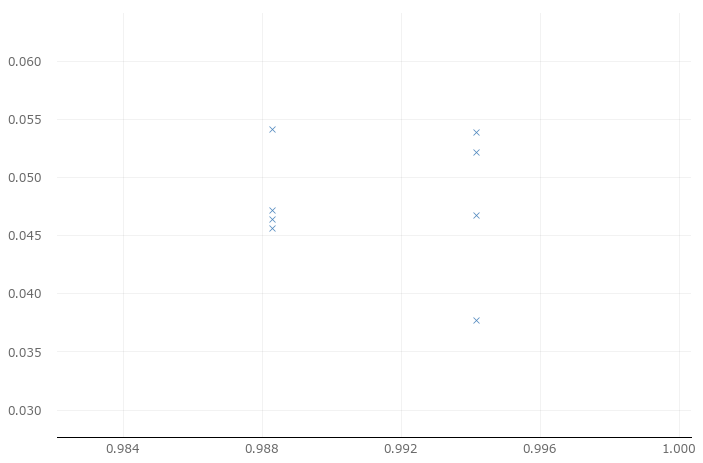

In [36]:
r.plot_regs()

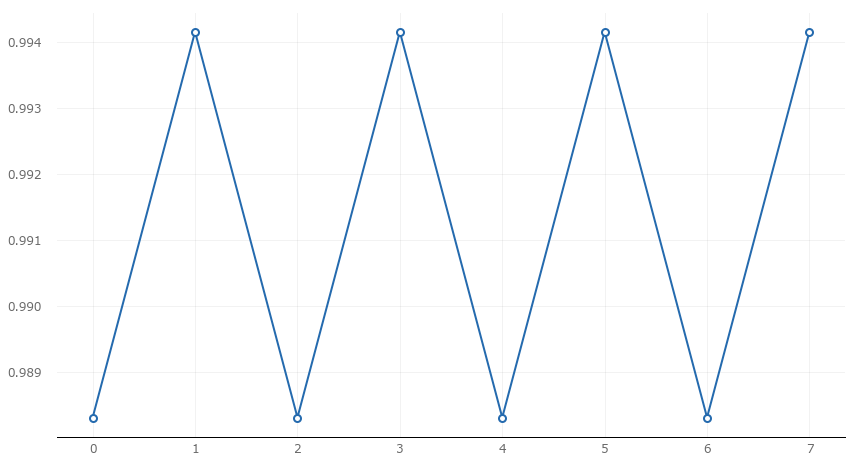

In [37]:
r.plot_line()

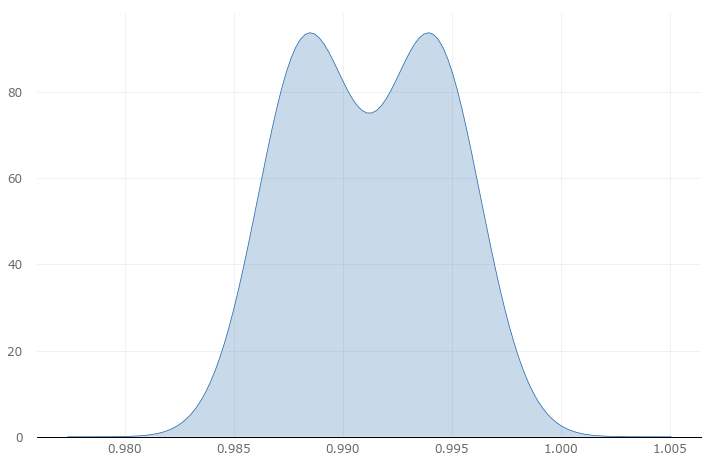

In [38]:
r.plot_kde('val_acc')

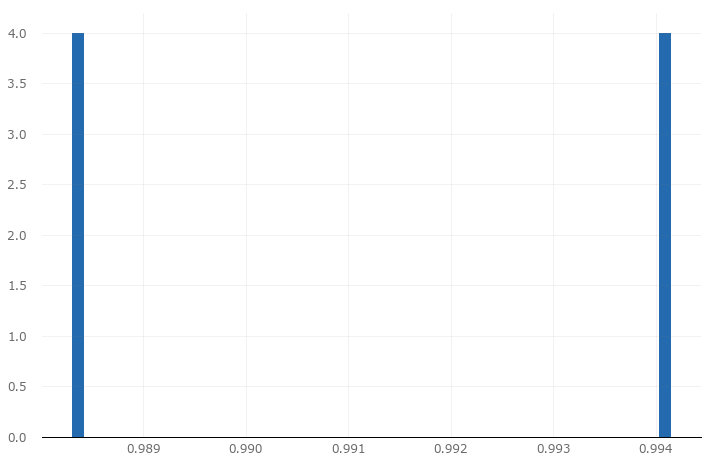

In [39]:
r.plot_hist(bins=50)

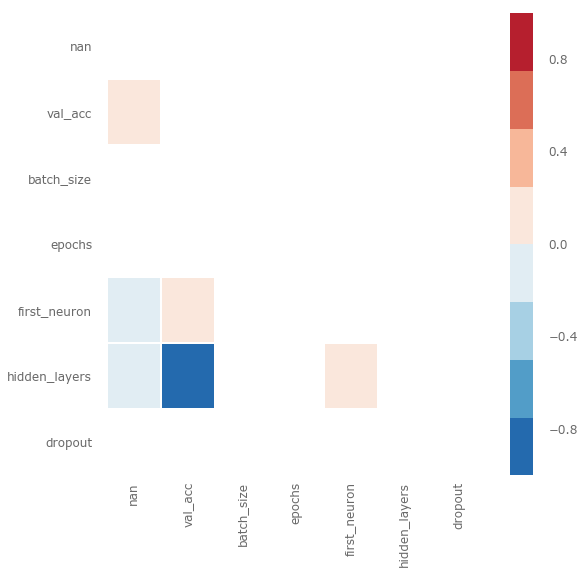

In [40]:
r.plot_corr()

In [49]:
e = ta.Evaluate(t)
e.evaluate(x, y, folds=10, average='macro')

98.02% (+/- 2.67%)
